In [1]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

# Check if p1 is within the polygon using the within function
p1.within(poly)

# Check if p2 is within the polygon
p2.within(poly)

# Does polygon contain p1?
poly.contains(p1)

# Does polygon contain p2?
poly.contains(p2)

False

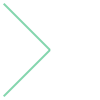

In [2]:
# Intersect
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

line_a.intersects(line_b)

line_a.touches(line_b)

# Create a MultiLineString from line_a and line_b
multi_line = MultiLineString([line_a, line_b])
multi_line

# Does the line touch with itself?
line_a.touches(line_a)

# Does the line intersect with itself?
line_a.intersects(line_a)

In [ ]:
# Point in Polygon using Geopandas
import geopandas as gpd

fp = "data/addresses.shp"
data = gpd.read_file(fp)

data.head()

# Reading KML-files in Geopandas
import geopandas as gpd
gpd.io.file.fiona.drvsupport.supported_drivers

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# Filepath to KML file
fp = "data/PKS_suuralue.kml"
polys = gpd.read_file(fp, driver='KML')

#Check the data
print("Number of rows:",len(polys))
polys.head(11)

%matplotlib inline
polys.plot()

# Select data
southern = polys.loc[polys['Name']=='Eteläinen']

# Reset index for the selection
southern.reset_index(drop=True, inplace=True)

# Mapping
import matplotlib.pyplot as plt

# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot polygons
polys.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')

# Plot points
data.plot(ax=ax, color='blue', markersize=5)

plt.tight_layout()

# Point in Polygon query.
#import shapely.speedups
from shapely import speedups
speedups.enabled

# If false, run this line:
#shapely.speedups.enable()

# Make mask
pip_mask = data.within(southern.at[0, 'geometry'])

pip_data = data.loc[pip_mask]

# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot polygons
polys.plot(ax=ax, facecolor='gray')
southern.plot(ax=ax, facecolor='red')

# Plot points
pip_data.plot(ax=ax, color='gold', markersize=2)

plt.tight_layout()
